In [53]:
epsgdic = {'nad83':4269,'wgs84':4326,'pseudoutm':3857,'worldmercater':3395}
outprjref = osr.SpatialReference()
outprjref.ImportFromEPSG(epsgdic["worldmercater"])
pointGeom = ogr.Geometry(ogr.wkbPoint)
pointGeom.AssignSpatialReference(inspref)

pointGeom2 = ogr.Geometry(ogr.wkbPoint)
pointGeom2.AssignSpatialReference(outprjref)
pointGeom.AddPoint(48.998841,-112.36503)
pointGeom2.AddPoint(48.998619,-113.009895)
pointGeom.Distance(pointGeom2)

NameError: name 'inspref' is not defined

In [51]:
a = np.arange(10).reshape(2,5)
print a
a=a[:,0:2]-a[:,2:4]
a = np.sum(a**2,axis=1)
a = np.sqrt(a)
a.max(),a.min()


[[0 1 2 3 4]
 [5 6 7 8 9]]


(2.8284271247461903, 2.8284271247461903)

In [5]:

'''pip install dbf

(you may need to pip install enum34 first)

and then the commands:
'''
# lightly tested
a
import dbf
import random

db = dbf.Table('whatever.dbf')
with db:
    db.add_fields('data N(12,7)')
    for record in db:
        dbf.write(record, data=random.random())

http://dbfpy.sourceforge.net/

NameError: name 'a' is not defined

In [ ]:
import glob
import shapefile
from dbfpy import dbf
shp_files = glob.glob("*.shp")
w = shapefile.Writer()
# Loop through ONLY the shp files and copy their shapes
# to a writer object. We avoid opening the dbf files
# to prevent any field-parsing errors.
for f in shp_files:
    print "Shp: %s" % f
    shpf = open(f, "rb")
    r = shapefile.Reader(shp=shpf)
    w._shapes.extend(r.shapes())
    print "Num. shapes: %s" % len(w._shapes)
    shpf.close()
# Save only the shp and shx index file to the new
# merged shapefile.
w.saveShp("merged.shp")
w.saveShx("merged.shx")
# Now we come back with dbfpy and merge the dbf files
dbf_files = glob.glob("*.dbf")
# Use the first dbf file as a template
template = dbf_files.pop(0)
merged_dbf_name = "merged.dbf"
# Copy the entire template dbf file to the merged file
merged_dbf = open(merged_dbf_name, "wb")
temp = open(template, "rb")
merged_dbf.write(temp.read())
merged_dbf.close()
temp.close()
# Now read each record from teh remaining dbf files
# and use the contents to create a new record in
# the merged dbf file. 
db = dbf.Dbf(merged_dbf_name)
for f in dbf_files:
    print "Dbf: %s" % f
    dba = dbf.Dbf(f)
    for rec in dba:
        db_rec = db.newRecord()
        for k,v in rec.asDict().items():
            db_rec[k] = v
        db_rec.store()
db.close()
http://geospatialpython.com/2014/06/merging-shapefiles-with-pyshp-and-dbfpy.html

In [56]:
#Create Pickle for State-Codes
import numpy as np
import pickle

home =r'/home/naresh-1/workspace/machinelrn/data/gis/'
stcodefile=home+'states-codes.csv'
SC=np.genfromtxt(stcodefile,delimiter=',',dtype=str)
state_dic = {}
for tup in SC:
    state_dic[int(tup[1])] = str(tup[2])
state_dic[999]='GlOBE'
state_dic[0] = 'USA'
pickle.dump(state_dic,open(home+'state_dic.p', "wb" ))
SC = pickle.load(open(home+'state_dic.p','rb'))

In [16]:
#!/usr/bin/python

import csv
from dbfpy import dbf
import os
import sys

filename = sys.argv[1]
if filename.endswith('.dbf'):
    print "Converting %s to csv" % filename
    csv_fn = filename[:-4]+ ".csv"
    with open(csv_fn,'wb') as csvfile:
        in_db = dbf.Dbf(filename)
        out_csv = csv.writer(csvfile)
        names = []
        for field in in_db.header.fields:
            names.append(field.name)
        out_csv.writerow(names)
        for rec in in_db:
            out_csv.writerow(rec.fieldData)
        in_db.close()
        print "Done..."
else:
print "Filename does not end with .dbf"

IndentationError: expected an indented block (<ipython-input-16-788a4288b2cb>, line 24)

In [15]:
from dbfpy import dbf
import datetime
## create empty DBF, set fields
 
db = dbf.Dbf("test.dbf", new=True)
db.addField(
    ("NAME", "C", 15),
    ("SURNAME", "C", 25),
    ("INITIALS", "C", 10),
    ("BIRTHDATE", "D"),
)
 
## fill DBF with some records
 
for name, surname, initials, birthdate in (
    ("John", "Miller", "JM", (1980, 1, 2)),
    ("Andy", "Larkin", "AL", datetime.date(1981, 2, 3)),
    ("Bill", "Clinth", "", datetime.date(1982, 3, 4)),
    ("Bobb", "McNail", "", "19830405"),
):
    
    rec = db.newRecord()
    rec["NAME"] = name
    rec["SURNAME"] = surname
    rec["INITIALS"] = initials
    rec["BIRTHDATE"] = birthdate
    rec.store()
db.close()

In [140]:
t =[0,1,2,3,4,5,6]
st=time.time()
for j in range(10000000):
    t[0]=t[1]=5
print (time.time()-st)
print ("..")
st2=time.time()
for j in range(10000000):
    t[0]=5
    t[1]=5
print (time.time()-st2)

1.74908208847
..
0.0164499282837


In [16]:
import itertools
from osgeo import ogr
import shapely
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt 
import math
import time
import pickle
import numpy as np
import sys
import time
import numpy        
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt 
import os
from descartes import PolygonPatch
from  osgeo import ogr, osr
#%matplotlib inline  
# Import the necessary modules


epsgdic = {'nad83':4269,'wgs84':4326,'pseudoutm':3857}
home =r'/home/naresh-1/workspace/machinelrn/data/gis/'
srcshpfile = home + r'ODNR_CNTY/ODNR_COUNTY.shp'
outputShapefile = home+ r'ODNR_CNTY_gws/gws84.shp'

driver = ogr.GetDriverByName('ESRI Shapefile')
shp = driver.Open(srcshpfile)

# Get Projection from layer
layer = shp.GetLayer()
sourceSpatialRef = layer.GetSpatialRef()
outgcsref= osr.SpatialReference()
outgcsref2= osr.SpatialReference()
outprjref = osr.SpatialReference()

if sourceSpatialRef.IsProjected:
    datum=sourceSpatialRef.GetAttrValue('GEOGCS|DATUM')
    if 'North_American_Datum_1983' in datum:
        outgcsref.ImportFromEPSG(epsgdic['nad83']) #NAD83 --> WGS84/4326
        outgcsref2.ImportFromEPSG(epsgdic['wgs84']) #NAD83 --> WGS84/4326
        outprjref.ImportFromEPSG(epsgdic['pseudoutm']) #sthGcs -->Proj/3857

#saving layer
if os.path.exists(outputShapefile):
    driver.DeleteDataSource(outputShapefile)
outDataSet = driver.CreateDataSource(outputShapefile)

outLayer = outDataSet.CreateLayer("mystates", geom_type=ogr.wkbMultiPolygon)
# add fields
inLayerDefn = layer.GetLayerDefn()
for i in range(0, inLayerDefn.GetFieldCount()):
    fieldDefn = inLayerDefn.GetFieldDefn(i)
    outLayer.CreateField(fieldDefn)

outLayerDefn = outLayer.GetLayerDefn()
inFeature = layer.GetNextFeature()
cnt = 0
while inFeature:
    inputGeom = inFeature.GetGeometryRef()
    # get the cover attribute for the input feature
    inputGeom.TransformTo(outgcsref)  #to nad83
    inputGeom.TransformTo(outgcsref2) #to WGS84
    #inputGeom.TransformTo(outprjref) #to WGS84/Pseudo Mercator

    outFeature = ogr.Feature(outLayerDefn)
    outFeature.SetGeometry(inputGeom)
    for i in range(0, outLayerDefn.GetFieldCount()):
        outFeature.SetField(outLayerDefn.GetFieldDefn(i).GetNameRef(), inFeature.GetField(i))
    outLayer.CreateFeature(outFeature)
    inFeature = None
    inFeature = layer.GetNextFeature()
    cnt+=1
prjfile = open(os.path.splitext(outputShapefile)[0]+'.prj','w')
prjfile.write(outgcsref2.ExportToPrettyWkt())
prjfile.close()
shp = None
outDataSet = None
print("completed cordinate transform.")

completed cordinate transform.


LINEARRING


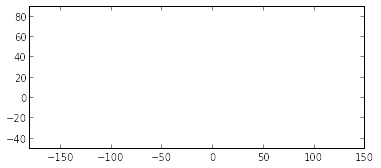

0


In [66]:

import matplotlib.path as mpath
import matplotlib.patches as mpatches
from osgeo import ogr
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt 
import pickle
import sys
import os
from descartes import PolygonPatch
from  osgeo import ogr, osr

# Extract first layer of features from shapefile using OGR
#ds = ogr.Open('world.shp')
#lyr = ds.GetLayer(0)

# Prepare figure
plt.ioff()
plt.subplot(1,1,1)
ax = plt.gca()

paths = []
lyr.ResetReading()

lyr.SetAttributeFilter ( " NAME = 'ANGOLA' ")
ax.set_xlim(-180, 150)
ax.set_ylim(-50, 90)
# Read all features in layer and store as paths
cnt=0
for geom in union:
    print(geom.GetGeometryName())
    envelope = np.array( geom.GetEnvelope())
    # check if geom is polygon
    if geom.GetGeometryType() == ogr.wkbPolygon:
        codes = []
        all_x = []
        all_y = []
        if geom.GetGeometryCount() < 6:
            continue
        for i in range(geom.GetGeometryCount()):
            cnt+=1
            # Read ring geometry and create path
            r = geom.GetGeometryRef(i)
            x = [r.GetX(j) for j in range(r.GetPointCount())]
            y = [r.GetY(j) for j in range(r.GetPointCount())]
            # skip boundary between individual rings
            codes += [mpath.Path.MOVETO] + (len(x)-1)*[mpath.Path.LINETO]
            all_x += x
            all_y += y
        path = mpath.Path(np.column_stack((all_x,all_y)), codes)
        paths.append(path)
# Add paths as patches to axes
for path in paths:
    patch = mpatches.PathPatch(path, \
            facecolor='0.8', edgecolor='RED')
    ax.add_patch(patch)

ax.set_aspect(1)
plt.show()


In [14]:
#!/usr/bin/python
import os
from  osgeo import ogr, osr
import pickle
from affine_transformation import *

def GetOutfeature(outLayer, outLayerDefn,geom,inFeature): #copy infeature to outLayer, and sets geom into feature.
    outFeature = ogr.Feature(outLayerDefn)
    outFeature.SetGeometry(geom)
    for i in range(0, outLayerDefn.GetFieldCount()):
        outFeature.SetField(outLayerDefn.GetFieldDefn(i).GetNameRef(), inFeature.GetField(i))
    return outFeature

epsgdic = {'nad83':4269,'wgs84':4326,'pseudoutm':3857,'worldmercater':3395}
home =r'/home/naresh-1/workspace/machinelrn/data/gis/'
srcshpfile = home + r'out/prj_states.shp'
outputShapefile = home+ r'out/prj.trans.states.shp'
tv = pickle.load(open(home+r'out/translation_vector.p','rb'))

driver = ogr.GetDriverByName('ESRI Shapefile')
shp = driver.Open(srcshpfile)
inlayer = shp.GetLayer()
outDataSet,outLayer, outLayerDefn = createOutLayer(inlayer,outputShapefile,"testlayer",inlayer.GetSpatialRef(),outgeomtype=ogr.wkbMultiPolygon)

#read the features one by one.
inFeature = inlayer.GetNextFeature()
while inFeature:
    geom= inFeature.GetGeometryRef()
    geom=translate(geom, xoff=-tv['xoff'], yoff=-tv['yoff'], zoff=0.0) #xoff val is -ve.
    # get the cover attribute for the input feature
    outFeature = GetOutfeature(outLayer, outLayerDefn,geom,inFeature)
    outLayer.CreateFeature(outFeature)
    
    inFeature=outFeature=geom=None
    inFeature = inlayer.GetNextFeature()
print("extents inlayer/outlayer"),inlayer.GetExtent(), outLayer.GetExtent()
shp = None
outDataSet = None
print("completed cordinate transform.")

got POLYGON False
object type 'POLYGON'
got POLYGON False
object type 'POLYGON'
got POLYGON False
object type 'POLYGON'
got POLYGON False
object type 'POLYGON'
got POLYGON False
object type 'POLYGON'
got POLYGON False
object type 'POLYGON'
got POLYGON False
object type 'POLYGON'
got POLYGON False
object type 'POLYGON'
got POLYGON False
object type 'POLYGON'
got POLYGON False
object type 'POLYGON'
got POLYGON False
object type 'POLYGON'
got POLYGON False
object type 'POLYGON'
got POLYGON False
object type 'POLYGON'
got POLYGON False
object type 'POLYGON'
got POLYGON False
object type 'POLYGON'
got POLYGON False
object type 'POLYGON'
got POLYGON False
object type 'POLYGON'
got POLYGON False
object type 'POLYGON'
got POLYGON False
object type 'POLYGON'
got POLYGON False
object type 'POLYGON'
got POLYGON False
object type 'POLYGON'
got POLYGON False
object type 'POLYGON'
got POLYGON False
object type 'POLYGON'
got POLYGON False
object type 'POLYGON'
got POLYGON False
object type 'POLYGON'


In [41]:

import os
from  osgeo import ogr, osr
import pickle
from affine_transformation import *
#testing co-ordinate system transformation.
point = ogr.Geometry(ogr.wkbPoint)
point1 = ogr.Geometry(ogr.wkbPoint)
poly = ogr.Geometry(ogr.wkbPolygon)
ring = ogr.Geometry(ogr.wkbLinearRing)
mpoly = ogr.Geometry(ogr.wkbMultiPolygon)

point.AddPoint(2,1)
point1.AddPoint(2,2)

ring.AddPoint(2,1)
ring.AddPoint(2,2)
ring.AddPoint(0,2)
ring.AddPoint(2,1)
poly.AddGeometry(ring)
mpoly.AddGeometry(poly)
mpoly.AddGeometry(poly)
#point.AddPoint(0,2)


inputref = osr.SpatialReference()
outprjrefwm = osr.SpatialReference()
inputref.ImportFromEPSG(4326)
outprjrefwm.ImportFromEPSG(3395)
#point.AssignSpatialReference(inputref)
#point.TransformTo(outprjrefwm)
#print point.GetPoint()[1]
point.Distance(point1)

1.0

In [17]:
import pickle
xmin,ymin,xmax,ymax=-20037508.3428, -15496570.7397, 20037508.3428, 18764656.2314
tv = {'epsg':3395,'name':'world mercator', 'unit':'meter', 'xoff':xmin,'yoff':ymin,'xmax':xmax,'ymax':ymin}
pickle.dump(tv,open(home+r'out/translation_vector.p','wb'))
tv = pickle.load(open(home+r'out/translation_vector.p','rb'))

6152274.928091211

In [1]:
#Testing.
import affine_transformation as at
reload(at)
import pickle
from  osgeo import ogr, osr
home =r'/home/naresh-1/workspace/machinelrn/data/gis/'
tv = pickle.load(open(home+r'out/translation_vector.p','rb'))
xoff,yoff=tv['xoff'],tv['yoff']
point = ogr.Geometry(ogr.wkbPoint)
poly = ogr.Geometry(ogr.wkbPolygon)
ring = ogr.Geometry(ogr.wkbLinearRing)
mpoly = ogr.Geometry(ogr.wkbMultiPolygon)

ring.AddPoint(2,1)
ring.AddPoint(2,2)
ring.AddPoint(0,2)
ring.AddPoint(2,1)
poly.AddGeometry(ring)
mpoly.AddGeometry(poly)
mpoly.AddGeometry(poly)
point.AddPoint(13885233.414708788+1, 7452828.220063132+1)

print point.GetPoints(),point.IsEmpty(),point.GetCoordinateDimension()
print ring.GetPoints(),ring.IsEmpty(),ring.GetCoordinateDimension()
print poly.GetBoundary(),poly.IsEmpty(),poly.GetCoordinateDimension()
print("xoff,yofof"),xoff,yoff

pt1=at.translate(point,-xoff,-yoff,enlarge=10000000)
'''
pt2=translate(ring,xoff,yoff)
pt3=translate(poly,xoff,yoff)
pt4=translate(mpoly,xoff,yoff)
print
print("translated"),point, pt1
print("translated"),ring, pt2
print("translated"),poly, pt3
print("translated"),mpoly,pt4 '''

NameError: name 'ogr' is not defined

In [31]:
#Testing.
#Testing labeling the segments
import pickle
from  osgeo import ogr, osr,gdal
from osgeo import *
from shapely.geometry import LinearRing,Point,mapping
point = ogr.Geometry(ogr.wkbPoint)
poly = ogr.Geometry(ogr.wkbPolygon)
ring = ogr.Geometry(ogr.wkbLinearRing)
mpoly = ogr.Geometry(ogr.wkbMultiPolygon)
ring2=[()]
ring.AddPoint(5,5)
ring.AddPoint(6,4)
ring.AddPoint(8,4)
ring.AddPoint(8,2)
ring.AddPoint(10,4)
ring.AddPoint(11,3)
ring.AddPoint(12,5)
ring.AddPoint(10,6)
ring.AddPoint(9,5)
ring.AddPoint(6,6)
ring.AddPoint(6,6)
ring.AddPoint(5,5)
#
point.AddPoint(5,5)
poly.AddGeometry(ring)
mpoly.AddGeometry(poly)

print("point"),point.GetPoints(),point.IsEmpty(),point.GetCoordinateDimension()
print("ring"),ring.GetPoints(),ring.IsEmpty(),ring.GetCoordinateDimension()
print("poly"),poly.GetBoundary(),poly.IsEmpty(),poly.GetCoordinateDimension()
print("type"),point.GetGeometryName(),ring.IsValid(),ring.GetBoundary()
#Shapely objects
ring.GetPoints()



point [(5.0, 5.0, 0.0)] False 3
ring [(5.0, 5.0, 0.0), (6.0, 4.0, 0.0), (8.0, 4.0, 0.0), (8.0, 2.0, 0.0), (10.0, 4.0, 0.0), (11.0, 3.0, 0.0), (12.0, 5.0, 0.0), (10.0, 6.0, 0.0), (9.0, 5.0, 0.0), (6.0, 6.0, 0.0), (6.0, 6.0, 0.0), (5.0, 5.0, 0.0)] False 3
poly LINESTRING (5 5 0,6 4 0,8 4 0,8 2 0,10 4 0,11 3 0,12 5 0,10 6 0,9 5 0,6 6 0,6 6 0,5 5 0) False 3
type POINT False None


[(5.0, 5.0, 0.0),
 (6.0, 4.0, 0.0),
 (8.0, 4.0, 0.0),
 (8.0, 2.0, 0.0),
 (10.0, 4.0, 0.0),
 (11.0, 3.0, 0.0),
 (12.0, 5.0, 0.0),
 (10.0, 6.0, 0.0),
 (9.0, 5.0, 0.0),
 (6.0, 6.0, 0.0),
 (6.0, 6.0, 0.0),
 (5.0, 5.0, 0.0)]

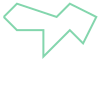

In [26]:
ring1=[(5.0, 5.0, 0.0),
 (6.0, 4.0, 0.0),
 (8.0, 4.0, 0.0),
 (8.0, 2.0, 0.0),
 (10.0, 4.0, 0.0),
 (11.0, 3.0, 0.0),
 (12.0, 5.0, 0.0),
 (10.0, 6.0, 0.0),
 (9.0, 5.0, 0.0),
 (6.0, 6.0, 0.0),
 (5.0, 5.0, 0.0)]

ring2=[(14,1),(17,2),(17,2),(17,4),(17,4),(15,4),(15,4),(14,7),(14,8),(9,8),(9,5),(10,6),(12,5),(11,3),(13,3),(14,1)]
shring1 = LinearRing(ring1)
shring2 = LinearRing(ring2)
shring1

In [35]:
import matplotlib.pyplot as plt
import numpy as np
import matplotlib

# Fixing random state for reproducibility
x=[t[0] for t in ring1]
y=[t[1] for t in ring1]
plt.plot(x, y,c="g", alpha=0.5, marker='.',
            label="Luck")
plt.xlabel("Leprechauns")
plt.ylabel("Gold")
plt.legend(loc=2)
plt.show()

In [37]:
polygon = shapely.geometry.polygon.orient(polygon)

https://code.i-harness.com/en/q/11c94f

SyntaxError: invalid syntax (<ipython-input-37-ce796ff1c491>, line 3)

In [203]:
def eqsegment(seg1p1,seg1p2,seg2p1,seg2p2,labeling=False): #tuples of points
    if not labeling:
        s0=sorted([seg1p1,seg1p2])
        s1=sorted([seg2p1,seg2p2])
        if s0[0][0] == s1[0][0] and s0[0][1] == s1[0][1] and s0[1][0] == s1[1][0] and s0[1][1] == s1[1][1]:
            return True
        return False
        
    
lables={'p0':0,'p1':1,'inf':'inf'}
pl=[]#rings
pl.append(list(shring1.coords));print len(pl[0]) #poly-1
pl.append(list(shring2.coords)) #poly-2
sl=[]
sl1=[(lables['p0'],i,i+1) for i in xrange(0,len(pl[0])-1)] #segments list poly-0,index \
                                                    #of points as segment end-points (pid,p1,p2)
sl2 =[(lables['p1'],i,i+1) for i in xrange(0,len(pl[1])-1)] #segment list poly-1
lr1=[] #left/ringt
if shring1.is_ccw:
    lr1=[[lables['p0'],lables['p0'],lables['inf']] for j in range(len(pl[0])-1)] #poly-0 corresponding 
                                                                                    #to segments
lr2=[]
if shring2.is_ccw:
    lr2=[[lables['p1'],lables['p1'],lables['inf']] for j in range(len(pl[1])-1)] #poly-1
lr=[lr1,lr2]
     
print("Looping")
for seg in sl1+sl2:
    polyid, ip1,ip2 = seg
    point1,point2 =pl[polyid][ip1],pl[polyid][ip2]
    #search other segment equal to this 'seg'.
    found=False
    for seg_p in sl1+sl2:
        polyid_p,ip1_p,ip2_p = seg_p
        if polyid != polyid_p:#not same polygon
            #segment equal?
            point3,point4 = pl[polyid_p][ip1_p],pl[polyid_p][ip2_p]
            if eqsegment(point1,point2,point3,point4):
                found=True
                if point1[0] < point2[0]:
                    lr[polyid][ip1][1] = polyid #top
                    lr[polyid][ip1][2] = polyid_p #bot
                    lr[polyid_p][ip1_p][1] =  polyid #same code.
                    lr[polyid_p][ip1_p][2] = polyid_p
                    break
                if point1[0] > point2[0]:
                    lr[polyid][ip1][1] = polyid_p #top
                    lr[polyid][ip1][2] = polyid #bot
                    lr[polyid_p][ip1_p][1] = polyid_p  
                    lr[polyid_p][ip1_p][2] = polyid
                    break
                if point1[0] == point2[0]:
                    if point1[1] < point2[1]: #vup
                        lr[polyid][ip1][1] = polyid #top
                        lr[polyid][ip1][2] = polyid_p #bot
                        lr[polyid_p][ip1_p][1] = polyid_p
                        lr[polyid_p][ip1_p][2] = polyid  
                        break
                    elif point1[1] > point2[1]: #vdown
                        lr[polyid][ip1][1] = polyid_p #top
                        lr[polyid][ip1][2] = polyid #bot
                        lr[polyid_p][ip1_p][1] = polyid_p  
                        lr[polyid_p][ip1_p][2] = polyid   
                        print("4 after top/bot "),lr[polyid][ip1],lr[polyid_p][ip1_p];print
                        break  #exit form current loop.
        
    #handle unshared segments
    if found == False:
        if point1[0] < point2[0]:
            lr[polyid][ip1][1] = polyid #top
            lr[polyid][ip1][2] = 'inf' #bot
            print("11 after top/bot "),lr[polyid][ip1],lr[polyid_p][ip1_p];print
        if point1[0] > point2[0]:
            lr[polyid][ip1][1] = 'inf' #top
            lr[polyid][ip1][2] = polyid #bot
            print("21 after top/bot "),lr[polyid][ip1],lr[polyid_p][ip1_p];print
        if point1[0] == point2[0]:
            if point1[1] < point2[1]: #vup
                lr[polyid][ip1][1] = polyid #top
                lr[polyid][ip1][2] = 'inf'#bot
                print("31 after top/bot "),lr[polyid][ip1],lr[polyid_p][ip1_p];print
            elif point1[1] > point2[1]: #vdown
                lr[polyid][ip1][1] = 'inf' #top
                lr[polyid][ip1][2] = polyid #bot
                print("41 after top/bot "),lr[polyid][ip1],lr[polyid_p][ip1_p];print   

print
sl = [sl1,sl2]
for i in range(len(sl)):
    s=sl[i]
    o=lr[i]
    print
    for j
    ,st in enumerate(s):
    
    polyid, ip1,ip2 = st
        point1,point2 =pl[polyid][ip1],pl[polyid][ip2]
        polyid,top,bottom=o[j]
        print("segments"),point1,'------',point2, " ", top,",",bottom

11
Looping
11 after top/bot  [0, 0, 'inf'] [1, 1, 'inf']

11 after top/bot  [0, 0, 'inf'] [1, 1, 'inf']

41 after top/bot  [0, 'inf', 0] [1, 1, 'inf']

11 after top/bot  [0, 0, 'inf'] [1, 1, 'inf']

11 after top/bot  [0, 0, 'inf'] [1, 1, 'inf']

shared by polys: (0, 5, 6) <--------> (1, 9, 10)
segments (11.0, 3.0, 0.0) ------ (12.0, 5.0, 0.0)
initial left/right [0, 0, 'inf'] [1, 1, 'inf']
1 after top/bot  [0, 0, 1] [1, 0, 1]

shared by polys: (0, 6, 7) <--------> (1, 8, 9)
segments (12.0, 5.0, 0.0) ------ (10.0, 6.0, 0.0)
initial left/right [0, 0, 'inf'] [1, 1, 'inf']
2 after top/bot  [0, 1, 0] [1, 1, 0]

shared by polys: (0, 7, 8) <--------> (1, 7, 8)
segments (10.0, 6.0, 0.0) ------ (9.0, 5.0, 0.0)
initial left/right [0, 0, 'inf'] [1, 1, 'inf']
2 after top/bot  [0, 1, 0] [1, 1, 0]

21 after top/bot  [0, 'inf', 0] [1, 1, 'inf']

21 after top/bot  [0, 'inf', 0] [1, 1, 'inf']

11 after top/bot  [1, 1, 'inf'] [1, 1, 'inf']

31 after top/bot  [1, 1, 'inf'] [1, 1, 'inf']

21 after top/bot 

In [269]:
#!/usr/bin/python
import os
from  osgeo import ogr, osr
import pickle

def search_neighborhood():
    pass

def GetOutfeature(outLayer, outLayerDefn,geom,inFeature): #copy infeature to outLayer, and sets geom into feature.
    outFeature = ogr.Feature(outLayerDefn)
    outFeature.SetGeometry(geom)
    for i in range(0, outLayerDefn.GetFieldCount()):
        outFeature.SetField(outLayerDefn.GetFieldDefn(i).GetNameRef(), inFeature.GetField(i))
    return outFeature

def createOutLayer(inlayer,outputShapefile, outlayername,outprojref,outgeomtype=ogr.wkbMultiPolygon):
    #create a data-set.
    outLayer=outLayerDefn=None
    if os.path.exists(outputShapefile):
        driver.DeleteDataSource(outputShapefile)
    outDataSet = driver.CreateDataSource(outputShapefile)
    
    # create output layer, copy fields from inlayer fielddefn
    outLayer = outDataSet.CreateLayer(outlayername,outprojref,geom_type=outgeomtype)
    
    inLayerDefn = inlayer.GetLayerDefn()
    
    for i in range(0, inLayerDefn.GetFieldCount()):
        fieldDefn = inLayerDefn.GetFieldDefn(i)
        outLayer.CreateField(fieldDefn)
    
    outLayerDefn = outLayer.GetLayerDefn()
    return outDataSet,outLayer, outLayerDefn

    
home =r'/home/naresh-1/workspace/machinelrn/data/gis/'
outputShapefile = home + r'out/test.shp'
driver = ogr.GetDriverByName('ESRI Shapefile')
from shapely.geometry import LinearRing,Point,mapping

driver = ogr.GetDriverByName('ESRI Shapefile')
if os.path.exists(outputShapefile):
    driver.DeleteDataSource(outputShapefile)
outDataSet = driver.CreateDataSource(outputShapefile)
outLayer = outDataSet.CreateLayer("states",sourceSpatialRef,
                                  geom_type=ogr.wkbMultiPolygon)#name,SpatialRef,geom type
outLayer.CreateField(ogr.FieldDefn('STATEFP'),ogr.OFTInteger)
outLayer.CreateField(ogr.FieldDefn('area'),ogr.OFTInteger)
layerDefn = outLayer.GetLayerDefn()



pid,#r 0 1
		LINEARRING
56283 56283 .. (-8979145.009099944, 2845509.1082229945)
#r,#segs 1 56281
------------end looping----------
1
56281
Result:polygon-id	,ring-id	,end-point-1	,end-point-2	,label-top,label-bottom
['p0', 'r0', (-8979145.009099944, 2845509.1082229945), (-8979102.596373953, 2845968.027967137), 'p0', 'inf']
['p0', 'r0', (-8979102.596373953, 2845968.027967137), (-8978986.267506074, 2846093.6230947855), 'p0', 'inf']
['p0', 'r0', (-8978986.267506074, 2846093.6230947855), (-8978568.262818145, 2846272.3141974495), 'p0', 'inf']
['p0', 'r0', (-8978568.262818145, 2846272.3141974495), (-8978154.376951374, 2846370.3266892754), 'p0', 'inf']
['p0', 'r0', (-8978154.376951374, 2846370.3266892754), (-8978188.106757086, 2846624.942477394), 'inf', 'p0']
['p0', 'r0', (-8978188.106757086, 2846624.942477394), (-8977962.684788229, 2846969.0346785863), 'p0', 'inf']
['p0', 'r0', (-8977962.684788229, 2846969.0346785863), (-8977884.649825182, 2847133.5767882676), 'p0', 'inf']
['p0', 'r0', (-897

In [55]:
def eqsegment(seg1p1,seg1p2,seg2p1,seg2p2,labeling=False): #tuples of points
    if not labeling:
        s0=sorted([seg1p1,seg1p2])
        s1=sorted([seg2p1,seg2p2])
        if s0[0][0] == s1[0][0] and s0[0][1] == s1[0][1] and s0[1][0] == s1[1][0] and s0[1][1] == s1[1][1]:
            return True
        return False
    
def GetSegmentsAsTuple(rings):
    L= []
    for ringid in xrange(len(rings)):
        ring=rings[ringid]
        for ptid in xrange(len(list(ring.coords))-1):
            point1 = list(ring.coords)[ptid][0:2]
            point2 = list(ring.coords)[ptid+1][0:2]
            
            x1,y1=point1
            x2,y2=point2
            isswapped,isvisited=False,False
            if x1 > x2:
                isswapped=True
                x1,y1 = point2
                x2,y2 = point1
            t=[ringid,x1,y1,x2,y2,isswapped,isvisited,ringid,'inf']
            #ringid, first-point,second-point,swapped?,visited?. ringid is on left.
            L+=[t]
    return L
def GetTopBottomLeveledSegmentTuples(L):

    L= sorted(L, key=lambda t: t[1]) 
    for ti in range(len(L)): #each tuple-index
        t = L[ti]
        polyid,s1x1,s1y1,s1x2,s1y2,s1isswapped = t[0:6]
        #check is swapped.
        if s1isswapped:x1,y1,x2,y2 = s1x2,s1y2,s1x1,s1y1 #get original arrangement of points for the seg.
        else:x1,y1,x2,y2 = s1x1,s1y1,s1x2,s1y2

        if t[6] == False: #not visited
            for nti in range(ti+1,len(L)):#new tuple index
                newt = L[nti]
                s2x1,s2y1,s2x2,s2y2,s2isswapped = newt[1:6]
                if s1x1 < s2x1: #no matching segment found
                    break
                if eqsegment((s1x1,s1y1),(s1x2,s1y2),(s2x1,s2y1),(s2x2,s2y2)):
                    #visited !!
                    t[6]=True
                    newt[6]=True
                    #now do casw-wise.
                    polyid,polyid_p = t[0],newt[0]
                    if x1 < x2: #not swapped
                        t[7] = t[0] #top
                        t[8] = newt[0] #bot
                        newt[7] =  t[0]#same code.
                        newt[8] = newt[0]
                        break
                    if x1 > x2:
                        t[7] = newt[0] #top
                        t[8] = t[0]#bot
                        newt[7] = newt[0]
                        newt[8] = t[0]
                        break
                    if x1 == x2:
                        if y1 < y2: #vup
                            t[7] = polyid #top
                            t[8] = polyid_p #bot
                            tnew[7] = polyid_p
                            tnew[8] = polyid  
                            break
                        elif y1 > y2: #vdown
                            t[7] = polyid_p #top
                            t[8] = polyid #bot
                            newt[7] = polyid_p  
                            newt[8] = polyid   
                            break  #exit form current loop.
            #end-for
            if t[6] == False: #this segment is no shared by any other rings.
                t[6]=True
                if x1 < x2:
                    t[7] = polyid #top
                    t[8] = 'inf' #bot
                if x1 > x2:
                    t[7] = 'inf' #top
                    t[8] = polyid #bot
                if x1 == x2:
                    if y1 < y2: #vup
                        t[7] = polyid #top
                        t[8] = 'inf'#bot
                    elif y1 > y2: #vdown
                        t[7] = 'inf' #top
                        t[8] = polyid #bot
            #end-if
        #end-if
    return L

from shapely.geometry import LinearRing,Point,mapping
ring1=[(5.0, 5.0, 0.0), (6.0, 4.0, 0.0), (8.0, 4.0, 0.0), (8.0, 2.0, 0.0), (10.0, 4.0, 0.0), (11.0, 3.0, 0.0), (12.0, 5.0, 0.0), (10.0, 6.0, 0.0),
 (9.0, 5.0, 0.0), (6.0, 6.0, 0.0), (5.0, 5.0, 0.0)]
ring2=[(14,1),(17,2),(17,4),(15,4),(14,7),(14,8),(9,8),(9,5),(10,6),(12,5),(11,3),(13,3),(14,1)]
shring1 = LinearRing(ring1)
shring2 = LinearRing(ring2)
rings=[shring1,shring2]
rings[0]
L= GetSegmentsAsTuple(rings) #list of segments
Lp= GetTopBottomLeveledSegmentTuples(L)
Lp= sorted(Lp, key=lambda t: t[0]) 
for t in Lp:
    print t
    
   

[0, 5.0, 5.0, 6.0, 4.0, False, False, 0, 'inf']
[0, 5.0, 5.0, 6.0, 6.0, True, False, 'inf', 0]
[0, 6.0, 4.0, 8.0, 4.0, False, False, 0, 'inf']
[0, 6.0, 6.0, 9.0, 5.0, True, False, 'inf', 0]
[0, 8.0, 4.0, 8.0, 2.0, False, False, 'inf', 0]
[0, 8.0, 2.0, 10.0, 4.0, False, False, 0, 'inf']
[0, 9.0, 5.0, 10.0, 6.0, True, True, 1, 0]
[0, 10.0, 4.0, 11.0, 3.0, False, False, 0, 'inf']
[0, 10.0, 6.0, 12.0, 5.0, True, True, 1, 0]
[0, 11.0, 3.0, 12.0, 5.0, False, True, 0, 1]
[1, 9.0, 8.0, 14.0, 8.0, True, False, 'inf', 1]
[1, 9.0, 8.0, 9.0, 5.0, False, False, 'inf', 1]
[1, 9.0, 5.0, 10.0, 6.0, False, True, 1, 0]
[1, 10.0, 6.0, 12.0, 5.0, False, True, 1, 0]
[1, 11.0, 3.0, 12.0, 5.0, True, True, 0, 1]
[1, 11.0, 3.0, 13.0, 3.0, False, False, 1, 'inf']
[1, 13.0, 3.0, 14.0, 1.0, False, False, 1, 'inf']
[1, 14.0, 1.0, 17.0, 2.0, False, False, 1, 'inf']
[1, 14.0, 7.0, 15.0, 4.0, True, False, 'inf', 1]
[1, 14.0, 7.0, 14.0, 8.0, False, False, 1, 'inf']
[1, 15.0, 4.0, 17.0, 4.0, True, False, 'inf', 1]
[1, 

In [1]:
import numpy as numpy
x = numpy.array([(1, 2), (3, 4)], dtype=[('a', '<f4'), ('b', '<f4')])
y = numpy.array([(5, 6), (7, 8)], dtype=[('a', '<f4'), ('b', '<f4')])
z = numpy.asarray([4,3])
print('x,y',x.shape,y.shape,z.shape)
print x
print numpy.vstack((x, y)).shape
print numpy.hstack((x, y)).shape
print numpy.dstack((x, y))

('x,y', (2,), (2,), (2,))
[(1.0, 2.0) (3.0, 4.0)]
(2, 2)
(4,)
[[[(1.0, 2.0) (5.0, 6.0)]
  [(3.0, 4.0) (7.0, 8.0)]]]


In [26]:
#!/usr/bin/python
import os
from  osgeo import ogr, osr
import pickle
from shapely.geometry import LinearRing,Point,mapping
import numpy as np
np.set_printoptions(precision=8)
np.set_printoptions(suppress=True)
INF = 999

def GetOutfeature(outLayer, outLayerDefn,geom,inFeature): #copy infeature to outLayer, and sets geom into feature.
    outFeature = ogr.Feature(outLayerDefn)
    outFeature.SetGeometry(geom)
    for i in range(0, outLayerDefn.GetFieldCount()):
        outFeature.SetField(outLayerDefn.GetFieldDefn(i).GetNameRef(), inFeature.GetField(i))
    return outFeature

home =r'/home/naresh-1/workspace/machinelrn/data/gis/'
srcshpfile = home + r'out/prj_states.shp'
driver = ogr.GetDriverByName('ESRI Shapefile')
shp = driver.Open(srcshpfile)
inlayer = shp.GetLayer()
#outDataSet,outLayer, outLayerDefn = createOutLayer(inlayer,None,"segment-labeled",inlayer.GetSpatialRef(),outgeomtype=ogr.wkbMultiPolygon)
import time
#read the features one by one.
inFeature = inlayer.GetNextFeature()
rings=[]
ringids=[]
sttime=time.time()
while inFeature:
    geom= inFeature.GetGeometryRef()
    if geom.GetGeometryName() == 'POLYGON':
        if geom.GetGeometryCount()>=1:
            for i in xrange(geom.GetGeometryCount()):
                ring= geom.GetGeometryRef(i)
                shapelyRing= LinearRing(ring.GetPoints())
                if not shapelyRing.is_ccw:
                    shapelyRing= LinearRing(reversed(ring.GetPoints()))
                rings+=[shapelyRing]
                ringids+=[inFeature.GetField(0)]#ringids+=['p'+str(inFeature.GetField(0))+'r'+str(i)]
    inFeature = inlayer.GetNextFeature()
#end-while
print "ringids", ringids[0:5]
rings = rings[0:3]
ringids=ringids[0:3]
PSV= np.zeros((1,5))
A = np.zeros((1,7)) #dummy variable
for ringid in xrange(len(rings)):
    arr=None
    ring=rings[ringid]
    arr = np.asarray(list(ring.coords)) #x1,y1,z1
    if ring.has_z:
        arr= arr[:,0:2] #exclude z.
    arr = np.hstack((arr[0:-1,:],arr[1:,:])) #shifting x1,y1,x2,y2
    isswapped = np.zeros(rids.shape)
    arr = np.hstack((arr,isswapped)) #add 'inf' as last column. also add isvisited after isswp?
    #arr --> [rid,x1,y1,x2,y2,iswp?,rid-left]
    def fnswap_endpoints(c):
        if c[3] < c[1]:
            t1,t2 = c[1],c[2]
            c[1]= c[3];c[2] =c[4];c[3] = t1;c[4] = t2; c[5] = 1
        return c
    arr = np.apply_along_axis(fnswap_endpoints,1,arr) #arr --> [rid,x1,y1,x2,y2,iswp?,rid-left]
    PSV = np.vstack((PSV,arr))
    rids = np.asarray([ringids[ringid]]*arr.shape[0]).reshape((arr.shape[0],1))
    A = np.vstack((A,rids))
    print
#end-for
m,n = PSV.shape
inf = np.asarray([INF]*(m-1)).reshape(m-1,1) #without dummy first row.
A = np.hstack((A[1:,:],inf)) #arr --> [x1,y1,x2,y2,iswp?]
PSV = PSV[PSV[:,0].argsort()] #sort by x1.;#L= sorted(L, key=lambda t: t[1]) 
isvisited = np.zeros((len(PSV),1))
PSV= np.hstack((PSV,isvisited)) #L's columns--> [rid,x1,y1,x2,y2,iswp?,rid-left,rid-right,isvisited?]
print L.shape
print L[0:10,0:]

ringids ['30', '54', '42', '45', '36']
type-list.ring.cords.0 -11582128.4488 <type 'float'>
arr-1 float64 -11582128.4488 <type 'numpy.float64'>
rids- |S2 (2327, 1) ['30']
isswapped- float64 [ 0.] <type 'numpy.ndarray'>
arr-2 |S2 |S2 |S2 |S2 |S2

type-list.ring.cords.0 -9127817.30975 <type 'float'>
arr-1 float64 -9127817.30975 <type 'numpy.float64'>
rids- |S2 (3888, 1) ['54']
isswapped- float64 [ 0.] <type 'numpy.ndarray'>
arr-2 |S2 |S2 |S2 |S2 |S2

type-list.ring.cords.0 -8963381.16733 <type 'float'>
arr-1 float64 -8963381.16733 <type 'numpy.float64'>
rids- |S2 (1827, 1) ['42']
isswapped- float64 [ 0.] <type 'numpy.ndarray'>
arr-2 |S2 |S2 |S2 |S2 |S2

(8042, 9)
[['-9' '44' '-9' '44' '54' '0.' '54' '99' '0.']
 ['-9' '44' '-9' '44' '54' '0.' '54' '99' '0.']
 ['-9' '44' '-9' '44' '54' '0.' '54' '99' '0.']
 ['-9' '44' '-9' '44' '54' '0.' '54' '99' '0.']
 ['-9' '44' '-9' '44' '54' '0.' '54' '99' '0.']
 ['-9' '44' '-9' '44' '54' '0.' '54' '99' '0.']
 ['-9' '44' '-9' '44' '54' '0.' '54' '99' 

In [ ]:
#!/usr/bin/python
import os
from  osgeo import ogr, osr
import pickle

def GetOutfeature(outLayer, outLayerDefn,geom,inFeature): #copy infeature to outLayer, and sets geom into feature.
    outFeature = ogr.Feature(outLayerDefn)
    outFeature.SetGeometry(geom)
    for i in range(0, outLayerDefn.GetFieldCount()):
        outFeature.SetField(outLayerDefn.GetFieldDefn(i).GetNameRef(), inFeature.GetField(i))
    return outFeature

def createOutLayer(inlayer,outputShapefile, outlayername,outprojref,outgeomtype=ogr.wkbMultiPolygon):
    #create a data-set.
    outLayer=outLayerDefn=None
    if os.path.exists(outputShapefile):
        driver.DeleteDataSource(outputShapefile)
    outDataSet = driver.CreateDataSource(outputShapefile)
    
    # create output layer, copy fields from inlayer fielddefn
    outLayer = outDataSet.CreateLayer(outlayername,outprojref,geom_type=outgeomtype)
    
    inLayerDefn = inlayer.GetLayerDefn()
    
    for i in range(0, inLayerDefn.GetFieldCount()):
        fieldDefn = inLayerDefn.GetFieldDefn(i)
        outLayer.CreateField(fieldDefn)
    
    outLayerDefn = outLayer.GetLayerDefn()
    return outDataSet,outLayer, outLayerDefn

    
home =r'/home/naresh-1/workspace/machinelrn/data/gis/'
srcshpfile = home + r'out/prj_usa.shp'
driver = ogr.GetDriverByName('ESRI Shapefile')
shp = driver.Open(srcshpfile)
inlayer = shp.GetLayer()
outDataSet,outLayer, outLayerDefn = createOutLayer(inlayer,outputShapefile,"segment-labeled",inlayer.GetSpatialRef(),outgeomtype=ogr.wkbMultiPolygon)

from shapely.geometry import LinearRing,Point,mapping

#read the features one by one.
inFeature = inlayer.GetNextFeature()
maplabels=[]
while inFeature:
    geom= inFeature.GetGeometryRef()
    #construct a shapely ring object.
    #get the cover attribute for the input feature
    featlabels=[]

    if geom.GetGeometryName() == 'POLYGON':
        print("pid,#r"), str(inFeature.GetField(0)),geom.GetGeometryCount()
        pid= str(inFeature.GetField(0))
        if geom.GetGeometryCount()>=1:
            for i in range(geom.GetGeometryCount()):
                ring=geom.GetGeometryRef(i)
                print("\t\t"),ring.GetGeometryName()
                npts=ring.GetPointCount()
                shapelyRing= LinearRing(ring.GetPoints())
                if shapelyRing.is_ccw:
                    print("\t\t ccw")
                    #convention: polyid,ringid,point1,point2,regLeft,regRt
                    seglabels=[['p'+pid,'r'+str(i),shapelyRing.coords[n],shapelyRing.coords[n+1],pid,'inf'] for n in xrange(npts-1)]#pid,ringid,pti-pti+1,?left,?right
                    featlabels.append(seglabels)
                else:
                    shapelyRing= LinearRing(reversed(ring.GetPoints()))
                    print npts, len(list(shapelyRing.coords)),'..',shapelyRing.coords[npts-1]
                    if shapelyRing.is_ccw:
                        seglabels=[['p'+pid,'r'+str(i),shapelyRing.coords[n],shapelyRing.coords[n-1],pid,'inf'] \
                                   for n in xrange(npts-1,1,-1)]
                                                #pid,ringid,pti-pti+1,?left,?right
                        featlabels.append(seglabels)
                    else:
                        raise TypeError("LinearRing from the point does not form a ccw rule.")
                        
    
    print("#r,#segs"),len(featlabels),len(seglabels)
    maplabels.append(featlabels)         
    #inFeature=geom=None
    inFeature = inlayer.GetNextFeature()
shp = None
outDataSet = None
print("------------end looping----------")
for featlabels in maplabels:
    print(len(featlabels))
    for ringlabels in featlabels:
        print len(ringlabels)

### Label top/down.
#three levels navaigation, feature->rings->segments
for featlabels in maplabels:
    for rlabels in featlabels:
        for segment in rlabels[0:]:
            polyid,point1,point2=segment[0],segment[2],segment[3]#polyid,ringid,point1,point2,regLeft,regRt
            
            if point1[0] < point2[0]:
                segment[4] = polyid #top
                segment[5] = 'inf' #bot
            if point1[0] > point2[0]:
                segment[4] = 'inf' #top
                segment[5] = polyid #bot
            if point1[0] == point2[0]:
                if point1[1] < point2[1]: #vup
                    segment[1] = polyid #top
                    segment[2] = 'inf'#bot
                elif point1[1] > point2[1]: #vdown
                    segment[1] = 'inf' #top
                    segment[2] = polyid #bot            
            #neighborhood searching: search a polygon that shares this segment.
            #get cords for this segment eg. ['p0', 'r0',- 56283, 56282, 0, 'inf'] given p1idx-x83,p2idx-x82
##TEsting
print("Result:polygon-id\t,ring-id\t,end-point-1\t,end-point-2\t,label-top,label-bottom")
for featlabels in maplabels:
    for rlabels in featlabels:
        for segment in rlabels[0:10]:
            print segment
print("completed segment labeling. Labeling table saved in: ")